<a href="https://colab.research.google.com/github/arifpras/tfda-djppr/blob/main/20250619_fpl_fwd_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Import the drive module from google.colab so we can access Google Drive

drive.mount('/content/drive')   # Mount (connect) your Google Drive to the path /content/drive so files can be accessed

Mounted at /content/drive


In [4]:
setwd("/content/drive/MyDrive/00fpl")  # Set the working directory to the specified folder in your Google Drive

getwd()                                # Show the current working directory to confirm the change

[1] "/content/drive/MyDrive/00fpl"

In [3]:
library(readr)   # Load the 'readr' package, which provides functions to read data (like CSV files)

library(dplyr)   # Load the 'dplyr' package, useful for data manipulation (filtering, selecting, grouping, etc.)

db00 <- read_csv("/content/drive/MyDrive/00fpl/db00all_fpl.csv", show_col_types = FALSE)
# Read the CSV file from your Google Drive into a data frame called 'db00'
# 'show_col_types = FALSE' hides the column type message

# db00 <- read_csv("https://raw.githubusercontent.com/arifpras/tfda-djppr/refs/heads/main/courses/workshop01/db00all_fpl.csv", show_col_types = FALSE)
# (Optional alternative) Load the same CSV file directly from a GitHub URL instead of Google Drive

In [9]:
glimpse(db00)  # Quickly display the structure of the 'db00' data frame: column names, types, and example values

Rows: 64,661
Columns: 40
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ x_p                        <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [10]:
important_vars <- c(
  "name", "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
  "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
  "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
  "influence", "minutes", "own_goals", "penalties_missed",
  "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
  "team_h_score", "threat", "transfers_balance", "value"
)
# Define a list of important columns to keep from the dataset

db01 <- db00 %>%
  select(all_of(important_vars)) %>%              # Keep only the specified columns from db00
  filter(minutes != 0, position == "FWD", value >= 36) %>%  # Keep only players with non-zero minutes, who play as forwards, and have value >= 36
  mutate(value = value / 10) %>%                  # Convert player value to original scale (e.g., 100 → 10.0)
  relocate(total_points)                          # Move 'total_points' column to the front
# Create a new filtered and cleaned dataset called db01

glimpse(db01)  # Display the structure of db01: column names, types, and example values

Rows: 2,483
Columns: 30
$ total_points               <dbl> 8, 1, 1, 1, 5, 1, 2, 7, 2, 9, 1, 1, 1, 5, 2…
$ name                       <chr> "Eddie Nketiah", "Kieffer Moore", "Fábio Si…
$ position                   <chr> "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "…
$ team                       <chr> "Arsenal", "Bournemouth", "Wolves", "Sheffi…
$ x_p                        <dbl> 2.4, 1.4, 1.4, 0.5, 2.1, 2.1, 0.9, 2.4, 1.4…
$ assists                    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0…
$ bps                        <dbl> 26, 2, 6, -5, 18, 1, 5, 26, -4, 33, 6, 3, 5…
$ clean_sheets               <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0…
$ creativity                 <dbl> 5.9, 3.3, 10.8, 0.0, 23.4, 0.0, 0.0, 0.0, 1…
$ expected_assists           <dbl> 0.01, 0.05, 0.01, 0.01, 0.10, 0.00, 0.09, 0…
$ expected_goal_involvements <dbl> 0.22, 0.09, 0.34, 0.25, 0.33, 0.12, 0.09, 1…
$ expected_goals

In [11]:
db01 %>% head()  # Show the first 6 rows of the cleaned dataset 'db01' to get a quick look at the data

total_points,name,position,team,x_p,assists,bonus,bps,clean_sheets,creativity,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Eddie Nketiah,FWD,Arsenal,2.4,0,2,26,1,5.9,⋯,0,0,0,210426,1,1,2,36,0,5.5
1,Kieffer Moore,FWD,Bournemouth,1.4,0,0,2,0,3.3,⋯,0,0,0,42328,0,1,1,7,0,5.0
1,Fábio Silva,FWD,Wolves,1.4,0,0,6,0,10.8,⋯,0,0,0,22652,0,0,1,57,0,5.5
1,William Osula,FWD,Sheffield Utd,0.5,0,0,-5,0,0.0,⋯,0,0,0,135543,1,1,0,0,0,4.5
5,Ollie Watkins,FWD,Aston Villa,2.1,1,0,18,0,23.4,⋯,0,0,0,2116959,1,1,5,29,0,8.0
1,Danny Ings,FWD,West Ham,2.1,0,0,1,0,0.0,⋯,0,0,0,165077,0,1,1,7,0,6.0


In [12]:
db01 %>%
  arrange(desc(total_points)) %>%                     # Sort the players from highest to lowest total points
  select(name, team, position, value, total_points)   # Select only key columns to display: name, team, position, value, and total points

name,team,position,value,total_points
<chr>,<chr>,<chr>,<dbl>,<dbl>
Ollie Watkins,Aston Villa,FWD,7.9,23
Erling Haaland,Man City,FWD,14.1,21
Erling Haaland,Man City,FWD,14.0,20
Jean-Philippe Mateta,Crystal Palace,FWD,5.1,20
Ollie Watkins,Aston Villa,FWD,8.8,18
Evan Ferguson,Brighton,FWD,5.9,17
Eddie Nketiah,Arsenal,FWD,5.5,17
Dominic Solanke,Bournemouth,FWD,6.8,17
Chris Wood,Nott'm Forest,FWD,4.9,17


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



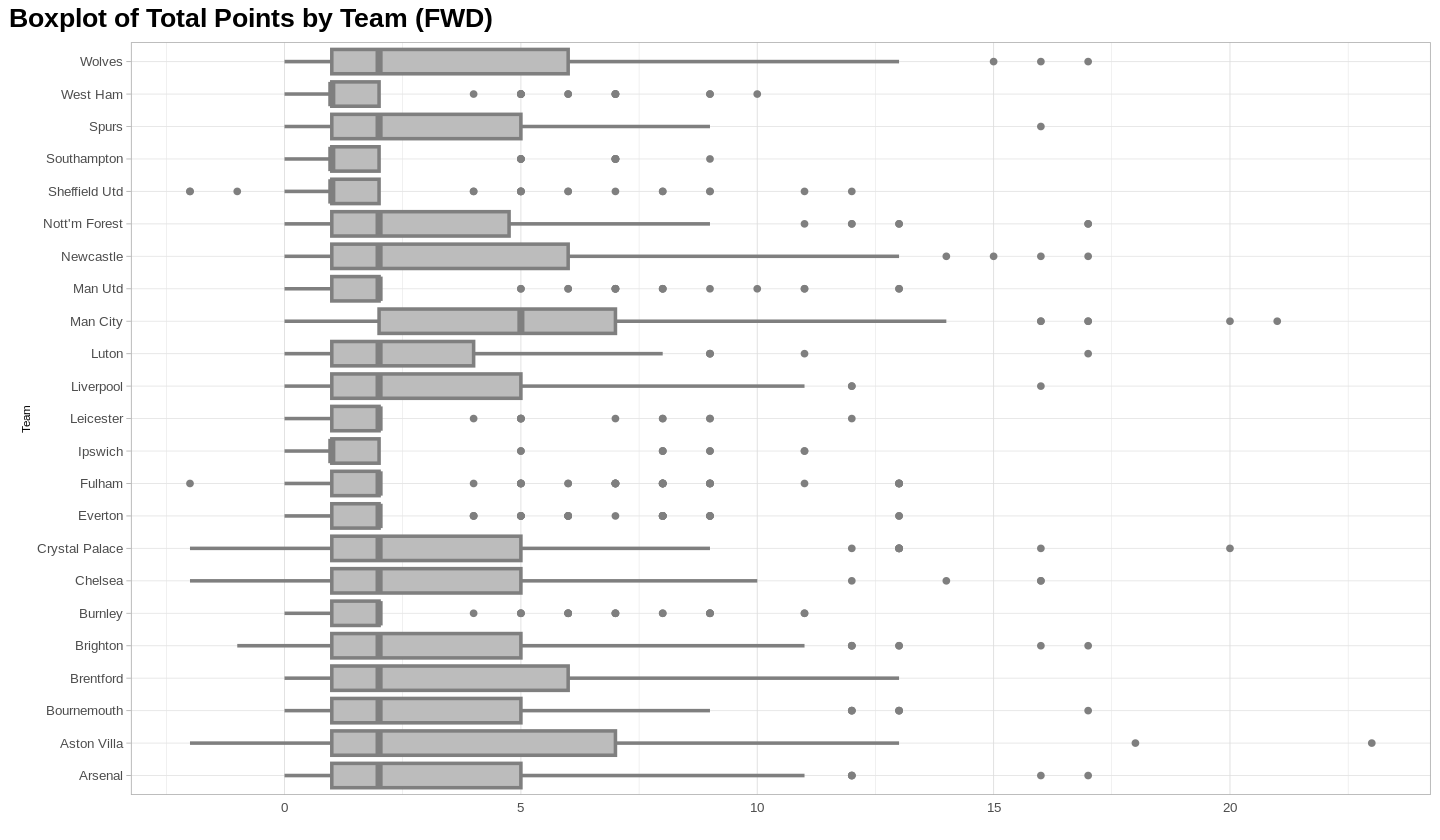

In [13]:
install.packages("colorspace")  # (Run once if not yet installed) Installs the 'colorspace' package for color customization

library(ggplot2)     # Load ggplot2 for plotting
library(colorspace)  # Load colorspace for advanced color manipulation
library(dplyr)       # Load dplyr for data manipulation

# Filter and plot
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

db01 %>%
  select(-name) %>%  # Exclude the 'name' column to simplify the plot
  ggplot(aes(x = team, y = total_points)) +  # Start a ggplot: team on x-axis (flipped later), total points on y-axis
  geom_boxplot(
    aes(
      fill = after_scale(desaturate(lighten(color, 0.7), 0.7))  # Use a lightened and desaturated version of the default fill color
    ),
    size = 1,      # Thickness of boxplot lines
    color = "grey50"  # Border color of boxplots
  ) +
  scale_fill_manual(values = NULL) +  # Allow manual fill scale (required when using after_scale, even if NULL)
  # facet_wrap(~ obsvar, scales = "free", nrow = 1) +  # (Optional) Facet if you'd like to split by another variable
  theme_light() +  # Use a clean light theme
  labs(
    title = "Boxplot of Total Points by Team (FWD)",  # Plot title
    x = "\nTeam",  # X-axis label
    y = "",        # No Y-axis label
    color = NULL   # No legend title
  ) +
  coord_flip() +  # Flip the coordinates to make team names readable (horizontal boxplots)
  theme(
    axis.text.x = element_text(size = 8),           # Customize x-axis text size
    axis.ticks.x = element_blank(),                 # Remove x-axis ticks
    axis.line.x = element_blank(),                  # Remove x-axis lines
    axis.title.x = element_text(size = 7),          # X-axis title size
    axis.text.y = element_text(size = 8),           # Y-axis (team names) text size
    axis.title.y = element_text(size = 7),          # Y-axis title size
    axis.line.y = element_blank(),                  # Remove y-axis lines
    plot.title = element_text(hjust = 0, size = 16, face = "bold"),  # Title aligned left, bold, larger size
    plot.title.position = "plot",                   # Title position
    strip.text.x = element_text(size = 8),          # Facet strip label size (if faceting)
    panel.grid.major.y = element_line(color = "grey90"),  # Light gridlines for readability
    panel.spacing = unit(1, "lines"),               # Spacing between facets (if used)
    legend.position = "none"                        # Hide legend
  )

How to Interpret the Plot:
- Each boxplot shows the distribution of total points scored by forwards (FWD) in each team.
- The thicker box represents the interquartile range (IQR), where the middle 50% of players fall.
- The line inside the box is the median — it shows the typical forward’s point output for that team.
- Longer whiskers or outliers indicate more variability or standout performers.
- Teams with higher boxes and medians generally have better-performing forwards.
- If a team has a short box with no outliers, it means their forwards perform consistently, but not necessarily well.

In [14]:
db01 %>%
  group_by(team) %>%  # Group the data by 'team'

  summarise(
    count_players = n(),                                    # Number of forwards in each team
    min_points = min(total_points, na.rm = TRUE),           # Minimum total points
    q1 = quantile(total_points, 0.25, na.rm = TRUE),        # 25th percentile (Q1)
    q2_median = median(total_points, na.rm = TRUE),         # Median (Q2)
    q3 = quantile(total_points, 0.75, na.rm = TRUE),        # 75th percentile (Q3)
    # q4 = max(total_points, na.rm = TRUE),                   # Maximum value (same as max_points, redundant here)
    max_points = max(total_points, na.rm = TRUE),           # Maximum total points (repeated for clarity)
    mean_points = mean(total_points, na.rm = TRUE),         # Mean total points
    value_weighted_avg = weighted.mean(total_points, w = value, na.rm = TRUE)  # Value-weighted average of total points
  ) %>%
  arrange(desc(q2_median))  # Sort the results by median total points (highest team medians first)

team,count_players,min_points,q1,q2_median,q3,max_points,mean_points,value_weighted_avg
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Man City,108,0,2,5,7.00,21,5.361111,5.686354
Arsenal,82,0,1,2,5.00,17,3.195122,3.276064
Aston Villa,105,-2,1,2,7.00,23,4.266667,4.572712
Bournemouth,147,0,1,2,5.00,17,3.285714,3.432641
Brentford,119,0,1,2,6.00,13,3.605042,3.658848
Brighton,145,-1,1,2,5.00,17,3.227586,3.217445
Burnley,96,0,1,2,2.00,11,2.635417,2.624695
Chelsea,90,-2,1,2,5.00,16,3.100000,3.214924
Crystal Palace,120,-2,1,2,5.00,20,3.433333,3.436578


In [15]:
install.packages("stargazer")  # (Run once) Install the 'stargazer' package for beautiful summary tables

library(stargazer)  # Load the stargazer package

db01 %>%
  as.data.frame() %>%                            # Convert tibble to standard data frame (stargazer prefers base data frames)
  stargazer(type = 'text',                      # Output the summary as plain text (other options: 'html', 'latex')
            out = "descsumm01_fwd.txt",         # Save the summary output to a text file named "descsumm01_fwd.txt"
            digits = 1)                         # Round all numeric summaries to 1 decimal place

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic                    N     Mean     St. Dev.      Min        Max   
---------------------------------------------------------------------------
total_points               2,483    3.1        3.4         -2        23    
x_p                        2,483    2.8        2.5        -1.2      17.9   
assists                    2,483    0.1        0.3         0          3    
bonus                      2,483    0.4        0.9         0          3    
bps                        2,483   10.8       15.3        -10        102   
clean_sheets               2,483    0.2        0.4         0          1    
creativity                 2,483    8.6       10.8        0.0       91.0   
expected_assists           2,483   0.05        0.1        0.0        1.0   
expected_goal_involvements 2,483    0.3        0.4        0.0        2.8   
expected_goals             2,483    0.3        0.4        0.0        2.8   
expected_goals_conceded    2,483    0.9        0.8        0.0        7.8   
goals_conce

In [16]:
install.packages("parameters")  # (Run once) Install the 'parameters' package to compute advanced descriptive statistics

library(dplyr)       # Load dplyr for data manipulation
library(parameters)  # Load parameters for descriptive summary functions

# Get the summary as a data frame
descsumm02 <- db01 %>%
  select(where(is.numeric)) %>%      # Select only numeric columns from db01
  describe_distribution()            # Generate descriptive stats (mean, SD, skewness, kurtosis, etc.)

descsumm02  # View the summary table

# Save it as plain text
capture.output(
  print(descsumm02, digits = 1),     # Format the output with 1 decimal precision
  file = "descsumm02_fwd.txt"        # Save the printed summary to a file named "descsumm02_fwd.txt"
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’




Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
total_points,3.130890e+00,3.352417e+00,4.00,-2.0,23.00,1.8947223,3.6712109,2483,0
x_p,2.753323e+00,2.522586e+00,3.20,-1.2,17.90,1.3671225,2.6577131,2483,0
assists,1.055175e-01,3.360878e-01,0.00,0.0,3.00,3.4024794,12.8793599,2483,0
bonus,3.749497e-01,8.931474e-01,0.00,0.0,3.00,2.1941918,3.2435958,2483,0
bps,1.083810e+01,1.527707e+01,14.00,-10.0,102.00,1.9386177,4.4062134,2483,0
clean_sheets,1.639146e-01,3.702726e-01,0.00,0.0,1.00,1.8168034,1.3018226,2483,0
creativity,8.639750e+00,1.082995e+01,12.60,0.0,91.00,1.8580425,4.8836072,2483,0
expected_assists,4.980669e-02,1.039186e-01,0.04,0.0,1.03,3.9072169,19.4038879,2483,0
expected_goal_involvements,3.073460e-01,3.894532e-01,0.44,0.0,2.83,1.9614000,4.8454698,2483,0


In [17]:
install.packages("corrr")  # (Run once) Install the 'corrr' package to compute and format correlation matrices

library(corrr)  # Load the corrr package

corr01 <- db01 %>%
  select(where(is.numeric)) %>%  # Keep only numeric columns from db01
  correlate() %>%                # Compute pairwise correlations between all numeric variables
  # shave() %>%                 # (Optional) Remove the upper triangle of the correlation matrix
  fashion()                     # Format the correlation matrix for cleaner display (aligns numbers, adds spacing)

corr01  # Display the formatted correlation table

# Save the output as a plain text file
capture.output(print(corr01), file = "corr01_fwd.txt")  # Write the result to "corr01_fwd.txt"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,total_points,x_p,assists,bonus,bps,clean_sheets,creativity,expected_assists,expected_goal_involvements,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,⋯,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
total_points,,.54,.43,.87,.96,.24,.33,.23,.65,⋯,,-.08,,.26,.39,.12,.17,.63,.10,.25
x_p,.54,,.24,.42,.50,.22,.34,.22,.48,⋯,,-.02,,.48,.45,.06,.07,.50,.37,.41
assists,.43,.24,,.18,.34,.11,.34,.33,.23,⋯,,.02,,.13,.16,.10,.13,.18,.02,.13
bonus,.87,.42,.18,,.83,.16,.24,.15,.49,⋯,,-.03,,.17,.23,.05,.09,.48,.07,.15
bps,.96,.50,.34,.83,,.22,.35,.25,.60,⋯,,-.07,,.24,.31,.13,.18,.59,.09,.23
clean_sheets,.24,.22,.11,.16,.22,,.20,.13,.22,⋯,,-.03,,.17,.36,-.18,-.16,.22,.10,.17
creativity,.33,.34,.34,.24,.35,.20,,.59,.38,⋯,,-.02,,.21,.41,.05,.03,.35,.10,.19
expected_assists,.23,.22,.33,.15,.25,.13,.59,,.39,⋯,,-.01,,.16,.24,.04,.06,.21,.06,.15
expected_goal_involvements,.65,.48,.23,.49,.60,.22,.38,.39,,⋯,,-.04,,.36,.41,.09,.10,.80,.14,.34


In [18]:
db01 %>%
  select(where(is.numeric)) %>%         # Select only numeric columns from db01
  correlate() %>%                        # Compute pairwise correlations between numeric variables
  as.data.frame() %>%                    # Convert the correlation matrix to a regular data frame
  write.csv("corr01_fwd.csv", row.names = FALSE)  # Save it as a CSV file without row names

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


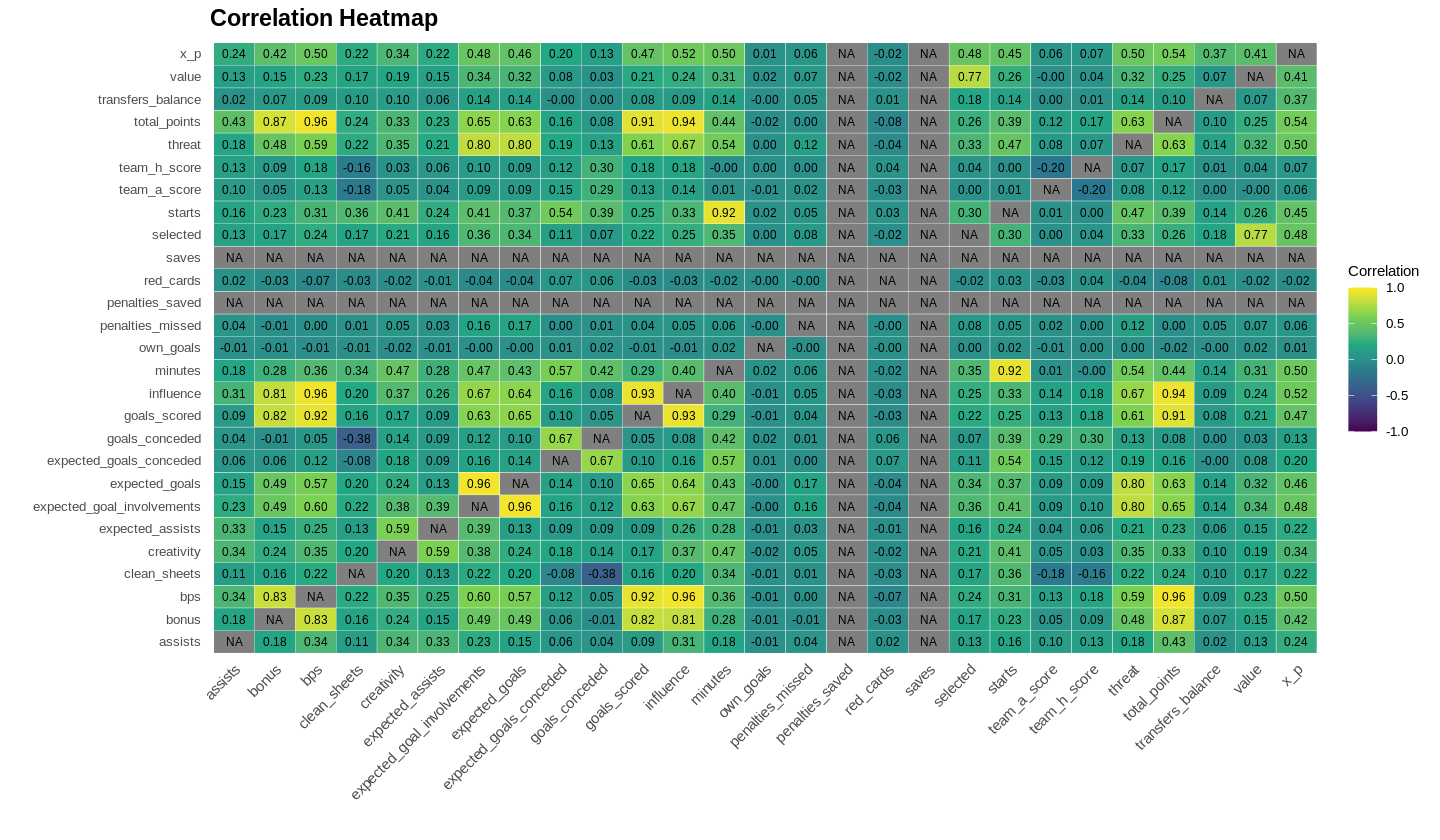

In [19]:
install.packages("viridis")  # (Run once) Install the 'viridis' package for colorblind-friendly color scales

library(corrr)     # For calculating correlations
library(dplyr)     # For data manipulation
library(tidyr)     # For reshaping data
library(ggplot2)   # For plotting
library(viridis)   # For advanced color palettes (colorblind-friendly)

# Step 1: Compute correlations
corr_matrix <- db01 %>%
  select(where(is.numeric)) %>%  # Select only numeric columns
  correlate()                    # Compute correlation matrix

# Step 2: Reshape to long format (for ggplot heatmap)
corr_long <- corr_matrix %>%
  pivot_longer(-term, names_to = "variable", values_to = "correlation")  # Convert wide matrix to long format

# Step 3: Create heatmap plot object
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

corr_plot <- ggplot(corr_long, aes(x = term, y = variable, fill = correlation)) +
  geom_tile(color = "white") +                                   # Create colored squares for each correlation
  geom_text(aes(label = sprintf("%.2f", correlation)), size = 2.5, color = "black") +  # Show correlation with exactly two decimals
  scale_fill_viridis_c(option = "D", limits = c(-1, 1), name = "Correlation") +  # Apply viridis color scale from -1 to 1
  # coord_fixed() +                                                # Fix aspect ratio for square tiles
  theme_minimal() +                                              # Use a clean minimal theme
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),  # Rotate x-axis labels for readability
    axis.text.y = element_text(size = 8),
    panel.grid = element_blank(),
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 8)
  ) +
  labs(title = "Correlation Heatmap", x = "", y = "")  # Set title and remove axis labels

corr_plot  # Display the heatmap in the notebook

# Step 4: Save to PDF
ggsave("heatmap01_fwd.pdf", plot = corr_plot, width = 11.7, height = 8.3, dpi = 300)  # Export the plot to a landscape A4 PDF

In [20]:
# library(tidyverse)  # (Optional) Load the full tidyverse suite if needed
library(tidyr)        # Load tidyr for data reshaping functions like pivot_longer()

db02 <- db01 %>%
  select(-name) %>%                  # Remove the 'name' column to simplify the reshaped data
  relocate(team, position) %>%      # Move 'team' and 'position' columns to the front
  pivot_longer(                     # Reshape the data from wide to long format:
    cols = total_points:value,      # Convert all columns from 'total_points' to 'value' into key-value pairs
    names_to = "obsvar",            # Store original column names in a new column called 'obsvar'
    values_to = "obsval"            # Store the corresponding values in a column called 'obsval'
  )

glimpse(db02)  # Display the structure of the reshaped dataset

Rows: 67,041
Columns: 4
$ team     <chr> "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsen…
$ position <chr> "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD", "FWD"…
$ obsvar   <chr> "total_points", "x_p", "assists", "bonus", "bps", "clean_shee…
$ obsval   <dbl> 8.00, 2.40, 0.00, 2.00, 26.00, 1.00, 5.90, 0.01, 0.22, 0.21, …


In [21]:
important_vars <- c(
  "total_points", "team", "assists", "creativity",
  "expected_assists", "expected_goals", "goals_scored", "influence",
  "minutes", "own_goals", "penalties_missed", "selected", "starts",
  "threat", "transfers_balance", "value"
)
# Define a list of important variables (column names) to include in the new dataset

db03 <- db01 %>%
  select(all_of(important_vars)) %>%  # Select only the specified variables from db01
  relocate(total_points)              # Move 'total_points' column to the front for easier reference

glimpse(db03)  # Display the structure of the new dataset (column types and example values)

Rows: 2,483
Columns: 16
$ total_points      <dbl> 8, 1, 1, 1, 5, 1, 2, 7, 2, 9, 1, 1, 1, 5, 2, 1, 7, 5…
$ team              <chr> "Arsenal", "Bournemouth", "Wolves", "Sheffield Utd",…
$ assists           <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity        <dbl> 5.9, 3.3, 10.8, 0.0, 23.4, 0.0, 0.0, 0.0, 11.7, 21.3…
$ expected_assists  <dbl> 0.01, 0.05, 0.01, 0.01, 0.10, 0.00, 0.09, 0.03, 0.00…
$ expected_goals    <dbl> 0.21, 0.04, 0.33, 0.24, 0.23, 0.12, 0.00, 1.30, 1.35…
$ goals_scored      <dbl> 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1…
$ influence         <dbl> 30.2, 0.0, 11.2, 0.0, 32.2, 3.0, 0.0, 0.0, 9.4, 49.8…
$ minutes           <dbl> 72, 23, 13, 90, 90, 12, 63, 87, 71, 71, 32, 14, 77, …
$ own_goals         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ penalties_missed  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ selected          <dbl> 210426, 42328, 22652, 135543, 2116959, 165077, 96850…
$ starts        

In [22]:
db03$team <- factor(db03$team)  # Convert the 'team' column to a factor (categorical variable)

db03$team <- relevel(db03$team, ref = "Man City")
# Set "Man City" as the reference category for the 'team' factor.
# This means all other team coefficients in the regression will be compared to "Man City"

ols_fwd_base <- lm(total_points ~ ., data = db03)
# Fit a linear regression model predicting total_points using all other variables in db03
# (The "." means "use all remaining columns as predictors")

# ols_fwd_robust <- lm_robust(
#   total_points ~ ., data = db03, se_type = "stata"
# )
# (Optional) Robust version using heteroskedasticity-consistent standard errors (commented out)

summary(ols_fwd_base)  # Print the summary of the OLS regression model

# summary(ols_fwd_robust)
# Print the robust regression summary (if using the lm_robust version)


Call:
lm(formula = total_points ~ ., data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3297 -0.1672  0.1088  0.2672  2.8072 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.916e-01  1.463e-01   5.411 6.87e-08 ***
teamArsenal         1.750e-02  1.102e-01   0.159 0.873805    
teamAston Villa     2.467e-02  9.846e-02   0.251 0.802183    
teamBournemouth     2.653e-02  1.059e-01   0.251 0.802214    
teamBrentford      -8.580e-02  1.064e-01  -0.807 0.419905    
teamBrighton       -7.613e-03  1.047e-01  -0.073 0.942032    
teamBurnley         3.067e-02  1.172e-01   0.262 0.793623    
teamChelsea        -1.574e-01  1.080e-01  -1.458 0.145070    
teamCrystal Palace  2.430e-02  1.075e-01   0.226 0.821127    
teamEverton         1.094e-01  1.060e-01   1.032 0.302210    
teamFulham          1.356e-01  1.099e-01   1.234 0.217346    
teamIpswich         6.825e-02  1.253e-01   0.545 0.586040    
teamLeicester       1.553e-01  1.3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Best lambda: 0.007464812 


37 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         7.402945e-01
teamArsenal         .           
teamAston Villa     .           
teamBournemouth     .           
teamBrentford      -6.672528e-02
teamBrighton        .           
teamBurnley         .           
teamChelsea        -1.492656e-01
teamCrystal Palace  .           
teamEverton         5.381145e-02
teamFulham          8.789135e-02
teamIpswich         4.259313e-04
teamLeicester       8.748347e-02
teamLiverpool      -5.014747e-02
teamLuton           .           
teamMan Utd         3.280912e-02
teamNewcastle       .           
teamNott'm Forest   1.248469e-01
teamSheffield Utd  -5.667385e-02
teamSouthampton     .           
teamSpurs          -1.903492e-02
teamWest Ham        .           
teamWolves          .           
assists             3.120041e+00
creativity          2.989771e-03
expected_assists   -4.037591e-03
expected_goals     -7.689363e-02
goals_scored        4.986753e+00
i

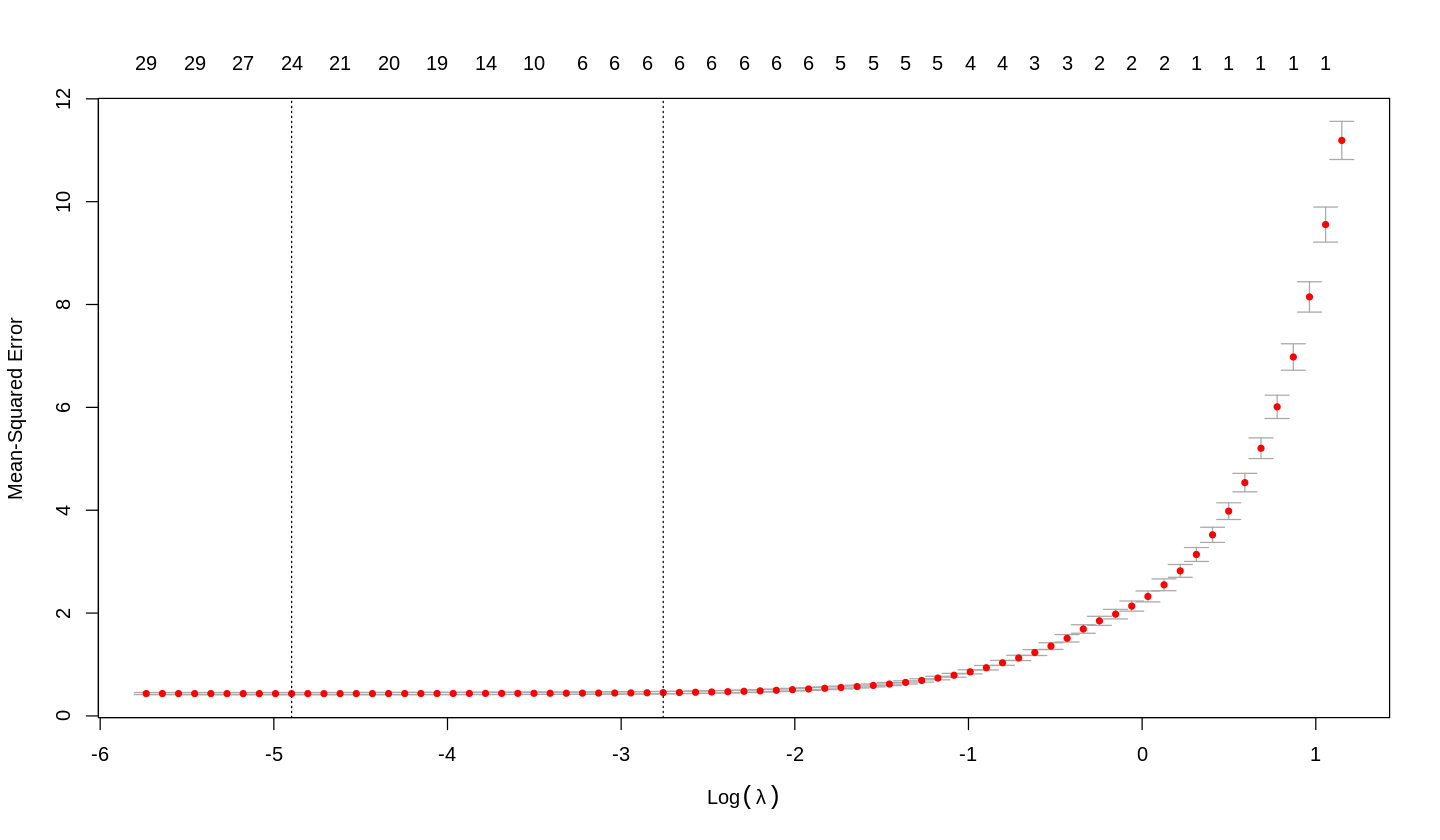

In [24]:
# Load required libraries
install.packages("glmnet")  # (Run once if not installed)
library(glmnet)  # For regularized regression like LASSO
library(dplyr)   # For data manipulation

# Prepare data
# (Uncomment and adjust if you want a custom version of db_lasso)
# db_lasso <- db01 %>%
#   select(total_points, team, x_p, assists, bonus, bps, clean_sheets, creativity,
#          expected_assists, expected_goals, goals_scored, influence,
#          minutes, own_goals, penalties_missed, selected, starts, threat,
#          transfers_balance, value) %>%
#   na.omit()  # Remove rows with missing values

# Convert categorical variable 'team' to dummy variables
x <- model.matrix(total_points ~ ., data = db03)[, -1]  # Create matrix of predictors (excluding intercept column)
y <- db03$total_points  # Target variable (total points)

# ⚙️ Fit LASSO using cross-validation
set.seed(123)  # For reproducibility
cv_fit <- cv.glmnet(x, y, alpha = 1, standardize = TRUE)
# Perform LASSO (alpha = 1) with automatic lambda tuning via cross-validation

# Optimal lambda
best_lambda <- cv_fit$lambda.min  # Best lambda minimizing mean cross-validated error
cat("Best lambda:", best_lambda, "\n")

# Plot cross-validation error curve
plot(cv_fit)  # Shows how model error changes as lambda increases

# Extract coefficients at best lambda
coef(cv_fit, s = "lambda.min")  # Show which variables are kept/shrunk

# Predict fitted values (optional)
pred <- predict(cv_fit, newx = x, s = "lambda.min")  # Make predictions using the selected lambda

What this does:

- Automatically selects the most predictive variables for total_points using LASSO regularization.
- Shrinks less important coefficients to zero — great for feature selection.
- Uses cross-validation to find the optimal penalty (lambda.min).

In [25]:
# Assuming `lasso_coef` is your sparse matrix from coef(cv_fit, s = "lambda.min")
lasso_coef <- coef(cv_fit, s = "lambda.min")
# Extract the coefficients from the best LASSO model (based on lambda.min)

# Convert to a tidy data frame
coef_df <- as.matrix(lasso_coef) %>%                  # Convert the sparse matrix to a regular matrix
  as.data.frame() %>%                                 # Convert matrix to data frame
  tibble::rownames_to_column(var = "feature") %>%     # Move row names (variable names) into a column called "feature"
  rename(coefficient = s0)                            # Rename the column holding coefficients to "coefficient"

# Optional: filter only non-zero coefficients
coef_df_nonzero <- coef_df %>%
  filter(coefficient != 0)  # Keep only the features selected by the LASSO (i.e., those with non-zero coefficients)

# View
print(coef_df_nonzero)  # Display the non-zero coefficients and their associated features

             feature   coefficient
1        (Intercept)  7.402945e-01
2      teamBrentford -6.672528e-02
3        teamChelsea -1.492656e-01
4        teamEverton  5.381145e-02
5         teamFulham  8.789135e-02
6        teamIpswich  4.259313e-04
7      teamLeicester  8.748347e-02
8      teamLiverpool -5.014747e-02
9        teamMan Utd  3.280912e-02
10 teamNott'm Forest  1.248469e-01
11 teamSheffield Utd -5.667385e-02
12         teamSpurs -1.903492e-02
13           assists  3.120041e+00
14        creativity  2.989771e-03
15  expected_assists -4.037591e-03
16    expected_goals -7.689363e-02
17      goals_scored  4.986753e+00
18         influence  1.331913e-02
19           minutes  9.870137e-03
20         own_goals -1.410073e+00
21  penalties_missed -2.516270e+00
22            starts  2.735488e-01
23            threat -1.855846e-03
24 transfers_balance  1.877231e-09
25             value -6.030336e-03


In [26]:
install.packages("estimatr")  # (Run once) Install for robust regression tools
library(estimatr)  # Load package (used if running lm_robust)

# install.packages("modelsummary")  # (Optional) Install for pretty regression tables
# library(modelsummary)  # Load modelsummary (used if you want clean tables with stars)

# 💡 Optional robust version using lm_robust (commented out)
# ols_fwd_lasso <- lm_robust(
#     total_points ~ team + assists + creativity + expected_assists + expected_goals +
#       goals_scored + influence + minutes + own_goals + penalties_missed + starts +
#       threat + transfers_balance + value, data = db03, se_type = "stata")

# Basic OLS regression using only variables selected by LASSO
ols_fwd_lasso <- lm(
  total_points ~ team + assists + creativity + expected_assists + expected_goals +
    goals_scored + influence + minutes + own_goals + penalties_missed + starts +
    threat + transfers_balance + value, data = db03)

# View summary of the model: coefficients, R², significance levels, etc.
summary(ols_fwd_lasso)

# (Optional) Generate a clean regression table with significance stars
# modelsummary(ols_fwd_lasso, stars = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Formula’





Call:
lm(formula = total_points ~ team + assists + creativity + expected_assists + 
    expected_goals + goals_scored + influence + minutes + own_goals + 
    penalties_missed + starts + threat + transfers_balance + 
    value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3343 -0.1721  0.1086  0.2679  2.7945 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.525e-01  1.430e-01   5.262 1.55e-07 ***
teamArsenal        -1.706e-02  1.068e-01  -0.160 0.873036    
teamAston Villa     1.804e-02  9.834e-02   0.183 0.854486    
teamBournemouth     9.025e-03  1.050e-01   0.086 0.931526    
teamBrentford      -1.084e-01  1.049e-01  -1.034 0.301279    
teamBrighton       -2.182e-02  1.041e-01  -0.210 0.834019    
teamBurnley         5.453e-03  1.156e-01   0.047 0.962367    
teamChelsea        -1.853e-01  1.057e-01  -1.753 0.079669 .  
teamCrystal Palace -3.299e-03  1.052e-01  -0.031 0.974994    
teamEverton         8.344e-02

This version runs an OLS regression using only the LASSO-retained predictors, helping you evaluate their statistical significance more traditionally (p-values, R², etc.).

In [27]:
# ols_fwdsw <- step(ols_fwd_base, direction = "both")
ols_fwdsw <- step(ols_fwd_base, direction = "both")
# Perform stepwise regression starting from the full model (ols_fwd_base)
# direction = "both" allows both forward selection and backward elimination
# The algorithm chooses the best subset of predictors based on AIC (Akaike Information Criterion)

summary(ols_fwdsw)
# Show the summary of the final model chosen by stepwise selection:
# includes coefficients, p-values, R², and diagnostic metrics

Start:  AIC=-2078.84
total_points ~ team + assists + creativity + expected_assists + 
    expected_goals + goals_scored + influence + minutes + own_goals + 
    penalties_missed + selected + starts + threat + transfers_balance + 
    value

                    Df Sum of Sq    RSS      AIC
- team              22     13.20 1056.5 -2091.63
- transfers_balance  1      0.07 1043.4 -2080.68
- expected_assists   1      0.52 1043.9 -2079.60
- selected           1      0.68 1044.0 -2079.21
<none>                           1043.3 -2078.84
- value              1      0.89 1044.2 -2078.72
- expected_goals     1      1.45 1044.8 -2077.40
- threat             1      2.17 1045.5 -2075.68
- own_goals          1      2.99 1046.3 -2073.74
- creativity         1      3.00 1046.3 -2073.71
- influence          1      6.16 1049.5 -2066.22
- starts             1      6.23 1049.6 -2066.07
- minutes            1     36.61 1080.0 -1995.21
- penalties_missed   1     58.10 1101.5 -1946.27
- goals_scored       1  


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

This method automatically selects a simpler, more efficient model by removing or adding predictors that improve the model's AIC. It's useful when you're unsure which combination of predictors performs best.

In [28]:
# install.packages("estimatr")  # (Run once) For robust regression tools
library(estimatr)  # Load for lm_robust if needed

# install.packages("modelsummary")  # (Optional) For clean regression output
# library(modelsummary)

# (Optional robust version using heteroskedasticity-consistent SEs)
# ols_fwd_stepwise <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + transfers_balance + value, data = db03, se_type = "stata")

# Standard OLS regression with predictors selected from stepwise procedure
ols_fwd_stepwise <- lm(
  total_points ~ assists + creativity + expected_goals + goals_scored +
    influence + minutes + own_goals + penalties_missed + selected +
    starts + threat + value, data = db03)

summary(ols_fwd_stepwise)
# View the summary: coefficients, significance levels, R², and diagnostics

# (Optional) Produce a nicely formatted regression table
# modelsummary(ols_fwd_stepwise, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

This model is leaner, based on variables chosen by the stepwise AIC approach — keeping only those that statistically and economically contribute to explaining total_points.

In [29]:
install.packages("MuMIn")  # (Run once) Install 'MuMIn' for model selection tools
library(MuMIn)  # Load the MuMIn package

options(na.action = "na.fail")
# Required by 'dredge': forces R to fail if missing data exists (ensures full variable combinations are valid)

ols_mumin <- get.models(
  dredge(ols_fwd_base, rank = "AICc"), 1
)[[1]]
# Perform exhaustive model search using 'dredge', ranked by AICc (corrected AIC for small samples)
# 'get.models(..., 1)[[1]]' extracts the **best model** (lowest AICc) from the full model set

summary(ols_mumin)
# Display the summary of the best model: coefficients, R², significance levels, and residuals

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Fixed term is "(Intercept)"




Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value + 1, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-

This approach performs an automated model selection across all possible combinations of predictors, not just forward/backward paths — using AICc as the selection criterion.

In [30]:
# install.packages("estimatr")  # (Run once) Install estimatr for robust regression
library(estimatr)  # Load estimatr (if using lm_robust)

# install.packages("modelsummary")  # (Optional) Install for nice summary tables
# library(modelsummary)

# Robust version (commented out): for heteroskedasticity-consistent standard errors
# ols_fwd_dredge <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03, se_type = "stata")

# Standard OLS model with predictors chosen via MuMIn::dredge (best AICc model)
ols_fwd_dredge <- lm(
  total_points ~ assists + creativity + expected_goals + goals_scored +
    influence + minutes + own_goals + penalties_missed + selected +
    starts + threat + value, data = db03)

summary(ols_fwd_dredge)
# View regression output: coefficient estimates, significance, R², residual stats

# (Optional) Clean output table with significance stars
# modelsummary(ols_fwd_dredge, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts            2.831e-01  

This final model reflects the most AICc-efficient subset from your original full model, selected via MuMIn::dredge.

In [31]:
install.packages("olsrr")  # (Run once) Install 'olsrr' for stepwise regression diagnostics
library(olsrr)  # Load the olsrr package

ols_step_both_p(ols_fwd_base)
# Perform stepwise regression based on p-values:
# - Starts with the full model (ols_fwd_base)
# - Adds/removes variables one at a time
# - Chooses variables based on their statistical significance (p-value thresholds)
# - Stops when no further significant improvements can be made

# Output:
# - A step-by-step log of which variables were added or removed
# - Final model summary (AIC, R², etc.)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘goftest’, ‘nortest’, ‘xplorerr’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers






                                     Stepwise Summary                                      
-----------------------------------------------------------------------------------------
Step    Variable                   AIC          SBC         SBIC         R2       Adj. R2 
-----------------------------------------------------------------------------------------
 0      Base Model              13056.728    13068.362     6006.504    0.00000    0.00000 
 1      influence (+)            7640.466     7657.917      590.483    0.88720    0.88716 
 2      assists (+)              7122.049     7145.318       71.406    0.90853    0.90846 
 3      goals_scored (+)         5843.800     5872.886    -1205.273    0.94538    0.94531 
 4      minutes (+)              5151.563     5186.466    -1895.705    0.95870    0.95864 
 5      penalties_missed (+)     5003.482     5044.203    -2043.247    0.96112    0.96105 
 6      threat (+)               4982.825     5029.363    -2063.825    0.96148    0.96138

This gives a p-value-based alternative to AIC-based stepwise methods — useful for quick, interpretable model refinement based on significance thresholds.

In [32]:
# install.packages("estimatr")  # (Run once) Install for robust standard error options
library(estimatr)  # Load for lm_robust (optional robust regression)

# install.packages("modelsummary")  # (Optional) Install for clean summary tables
# library(modelsummary)

# (Optional) Robust OLS version using heteroskedasticity-consistent SEs
# ols_fwd_olsrr <- lm_robust(
#     total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
#       threat + starts + own_goals + creativity + value +
#       expected_goals + selected, data = db03, se_type = "stata")

# Standard OLS model using predictors selected via olsrr::ols_step_both_p()
ols_fwd_olsrr <- lm(
  total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
    threat + starts + own_goals + creativity + value +
    expected_goals + selected, data = db03)

summary(ols_fwd_olsrr)
# Show regression summary: estimates, standard errors, significance, and fit stats

# (Optional) Display a clean summary table with significance stars
# modelsummary(ols_fwd_olsrr, stars = TRUE)


Call:
lm(formula = total_points ~ influence + assists + goals_scored + 
    minutes + penalties_missed + threat + starts + own_goals + 
    creativity + value + expected_goals + selected, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
threat           -2.681e-03  1.200e-03  -2.235 0.025510 *  
starts            2.831e-01  6.961e-02   4.067 4.92e-05 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
value            -3.084e-02  

This model uses predictors identified via p-value-based stepwise selection `(ols_step_both_p())`, giving you a practical and statistically guided subset.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘ggeffects’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



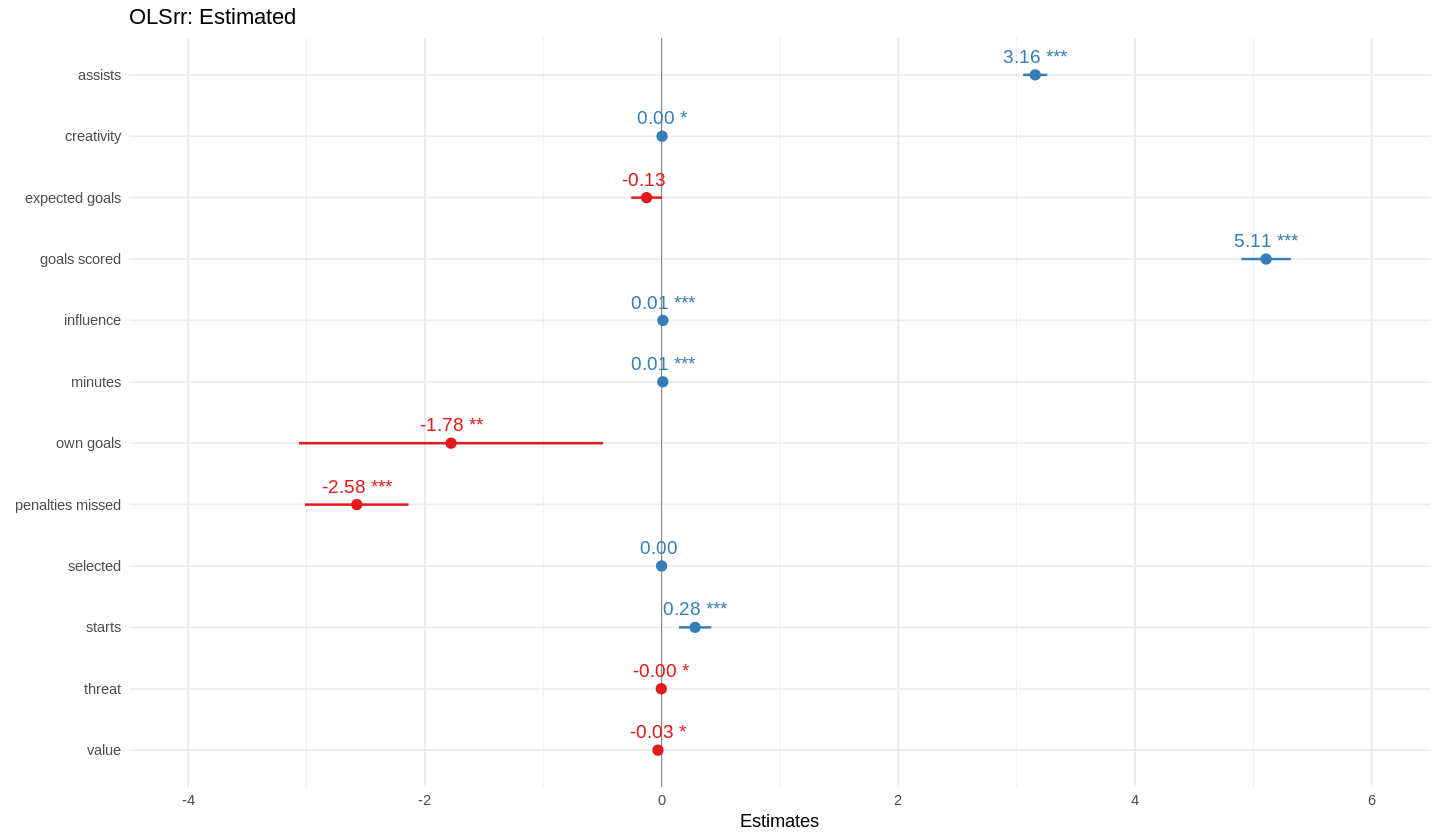

In [35]:
install.packages("gridExtra")  # (Run once) For arranging multiple plots
library(gridExtra)  # Load for grid-based plot arrangement

install.packages("sjPlot")  # (Run once) For plotting model summaries
library(sjPlot)  # Load for visualizing regression results

p1 <- plot_model(ols_fwd_dredge,           # Use the model selected via MuMIn::dredge
                 type = "est",             # Plot unstandardized coefficient estimates
                 show.values = TRUE,       # Show the coefficient values next to the bars
                 value.offset = 0.3,       # Offset distance for the displayed values
                 title = "OLSrr: Estimated",  # Title for the plot
                 vline.color = "gray50") +    # Color of the vertical zero reference line
  theme_minimal()  # Apply a clean minimal theme

# Optional standardized version (commented out)
# p2 <- plot_model(ols_fwd_dredge,
#                  type = "std",           # Plot standardized coefficients (beta)
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLSrr: Standardized",
#                  vline.color = "gray50") +
#   theme_minimal()

grid.arrange(p1, ncol = 1)  # Display the plot(s) in a grid layout (here: just p1 in 1 column)

This generates a visual summary of your regression coefficients, making it easier to interpret direction, size, and confidence intervals at a glance.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 methods overwritten by 'broom':
  method        from 
  nobs.fitdistr MuMIn
  nobs.multinom MuMIn



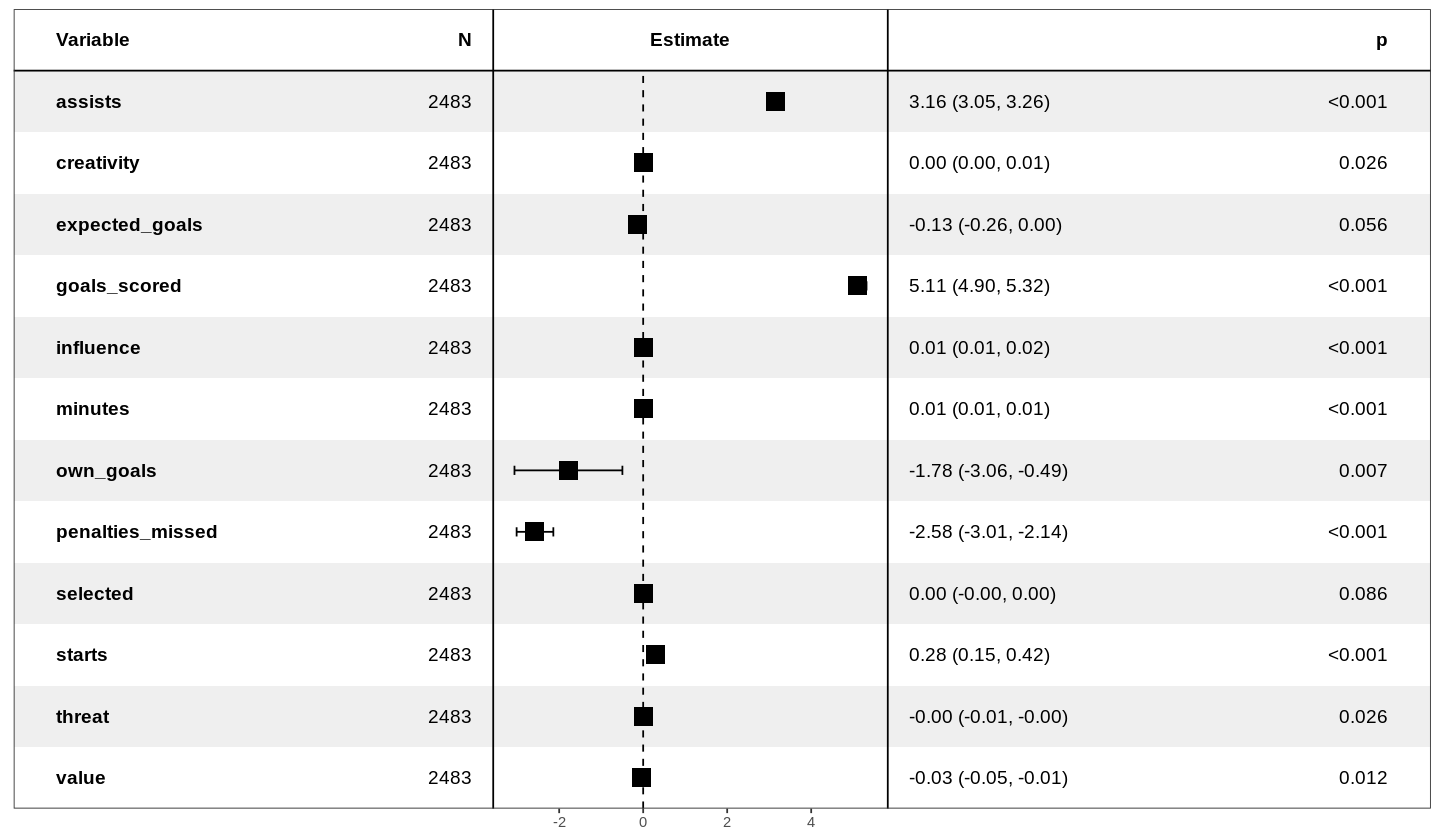

In [36]:
install.packages("forestmodel")  # (Run once) Install the 'forestmodel' package for forest-style coefficient plots

library(forestmodel)  # Load the package

forest_model(
  ols_fwd_dredge,  # Use the final OLS model selected via MuMIn::dredge
  theme = theme_forest(),  # Apply a clean, publication-ready forest plot theme
  format_options = forest_model_format_options(text_size = 4)  # Adjust font size (smaller for compact display)
)

This creates a forest plot showing:
- Coefficient estimates
- 95% confidence intervals
- Significance visually (whether CI crosses zero)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘correlation’, ‘modelbased’, ‘patchwork’




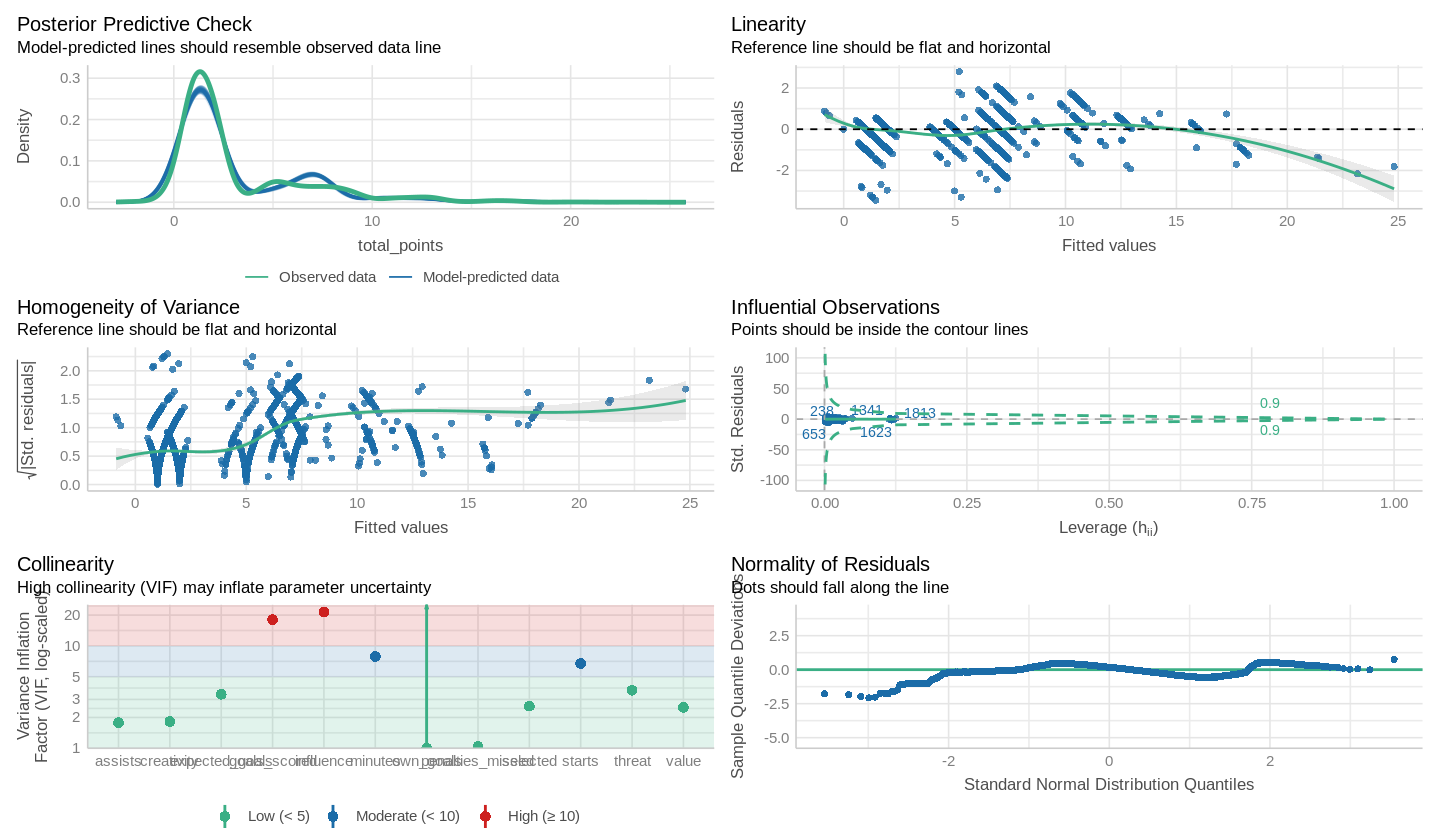

In [37]:
install.packages("see")  # (Run once) Install 'see' for plotting model diagnostics

library(performance)  # Load for model checking tools (residuals, multicollinearity, etc.)
library(see)          # Load for visualizing performance checks

check_model(ols_fwd_dredge)
# Automatically generates a panel of diagnostic plots:
# Residuals vs Fitted
# Normal Q-Q
# Scale-Location
# Cook’s Distance
# Leverage
# Multicollinearity (VIF)

# Great for quickly checking:
# - Linearity
# - Homoscedasticity
# - Influential observations
# - Normality of residuals
# - Multicollinearity

**A simple guide to interpreting the plots from `check_model()` in plain English:**

***Residuals vs Fitted***

> What to look for: Points should be randomly scattered around the horizontal line (y = 0).
> If you see a pattern (curve or funnel):
- Your model may have non-linearity or heteroskedasticity.
- Consider transforming variables or using a different model.


***Normal Q-Q (Quantile–Quantile Plot)***

> What to look for: Points should follow the diagonal line.
> If points deviate a lot at the ends:
- Your residuals may not be normally distributed.
- Normality matters most for inference (p-values, confidence intervals).

***Scale-Location (Spread–Location Plot)***

> What to look for: Points should be randomly spread with a flat trend.
> If it fans out or has a pattern:
- Your model may suffer from non-constant variance (heteroskedasticity).

***Cook’s Distance***

> What to look for: Most points should be low and similar in height.
- Tall spikes: Indicate influential points — data that heavily affects the model.
- Investigate these — they may be valid outliers or data entry issues.

***Leverage Plot***

> What to look for: Most points should be close to the left.
- Points far to the right: These have high leverage (unusual x-values).
- If also high in Cook’s Distance → potentially problematic outlier.

***Multicollinearity (VIF)***

> What to look for: VIF values should ideally be < 5.
- If VIF > 5–10: Suggests high multicollinearity — predictors may be too correlated.
- Consider removing or combining variables.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





 Model Summary:

Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + influence + minutes + own_goals + penalties_missed + 
    selected + starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4474 -0.1523  0.1149  0.2547  2.7947 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.727e-01  6.956e-02  12.546  < 2e-16 ***
assists           3.157e+00  5.209e-02  60.598  < 2e-16 ***
creativity        3.649e-03  1.638e-03   2.227 0.026021 *  
expected_goals   -1.270e-01  6.652e-02  -1.909 0.056315 .  
goals_scored      5.108e+00  1.068e-01  47.838  < 2e-16 ***
influence         1.121e-02  3.107e-03   3.607 0.000316 ***
minutes           1.015e-02  1.111e-03   9.137  < 2e-16 ***
own_goals        -1.779e+00  6.552e-01  -2.716 0.006659 ** 
penalties_missed -2.576e+00  2.229e-01 -11.558  < 2e-16 ***
selected          2.593e-08  1.510e-08   1.717 0.086098 .  
starts      

Warning message:
“not plotting observations with leverage one:
  1917”


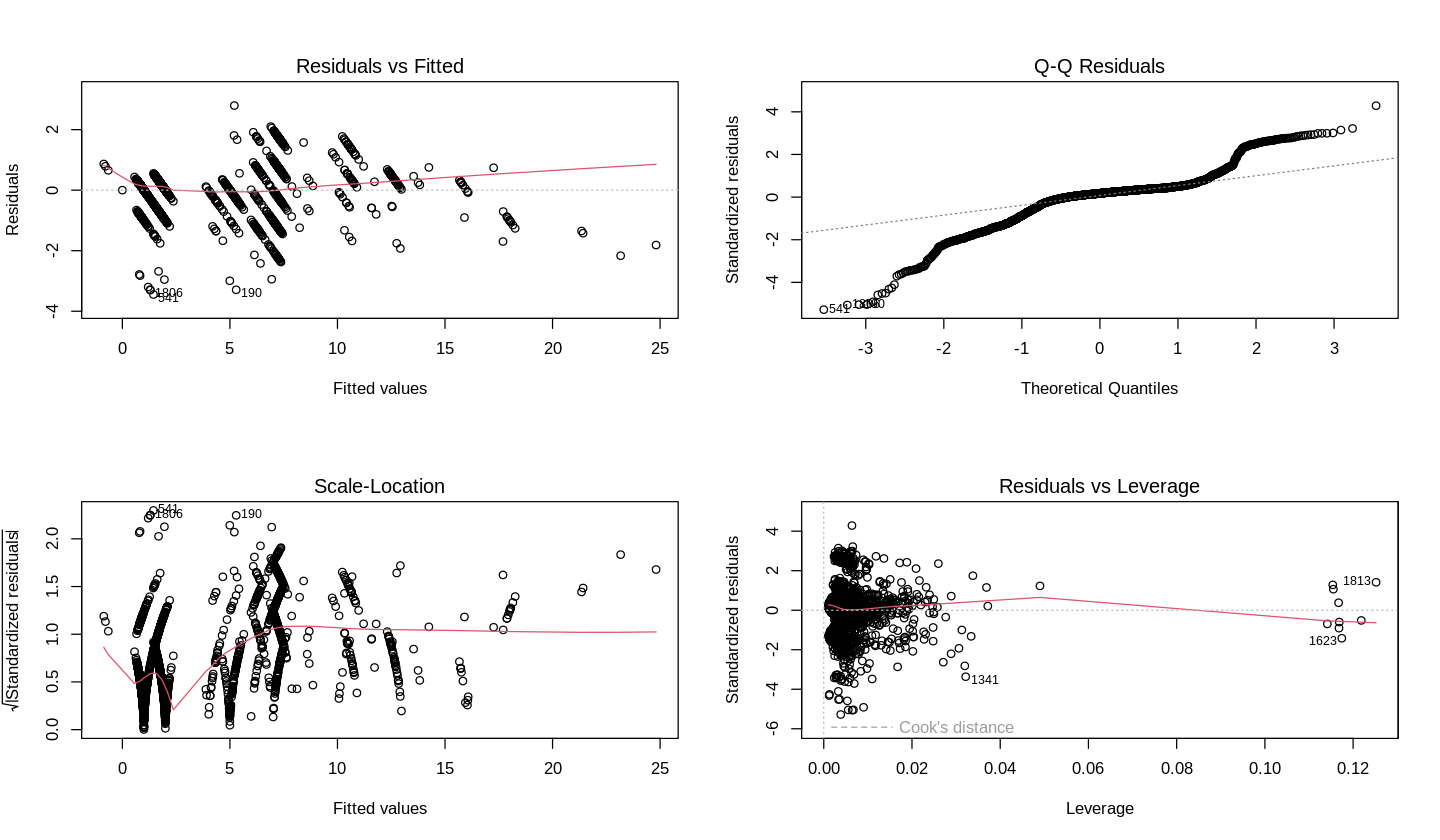

In [38]:
# Required packages
install.packages("car")       # (Run once) Provides tools like VIF and linearHypothesis
install.packages("lmtest")    # (Run once) Provides tests like Breusch–Pagan and Durbin–Watson

library(car)     # Load the 'car' package for regression diagnostics
library(lmtest)  # Load the 'lmtest' package for hypothesis testing and autocorrelation checks

# ---- 1. Model Summary ----
cat("\n Model Summary:\n")
print(summary(ols_fwd_dredge))  # Display coefficients, R-squared, and p-values for your model

# ---- 2. Multicollinearity Check ----
cat("\n Variance Inflation Factor (VIF):\n")
print(vif(ols_fwd_dredge))  # Check if any predictors are too correlated (VIF > 5 or 10 is a concern)

# ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
cat("\n Breusch–Pagan Test for Heteroskedasticity:\n")
print(bptest(ols_fwd_dredge))  # Test whether residual variance is constant
# If p < 0.05 → your model may have heteroskedasticity (bad)

# ---- 4. Autocorrelation Check (Durbin-Watson) ----
cat("\n Durbin–Watson Test for Autocorrelation:\n")
print(dwtest(ols_fwd_dredge))  # Test if residuals are correlated (esp. in time series)
# DW ~ 2 is ideal. Much < 2 suggests positive autocorrelation

# ---- 5. Normality of Residuals ----
cat("\n Shapiro-Wilk Test for Normality of Residuals:\n")
print(shapiro.test(residuals(ols_fwd_dredge)))  # Test if residuals are normally distributed
# p > 0.05 means residuals are likely normal (a good thing)

# # ---- 6. Influence and Outlier Detection ----
# cat("\n Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(ols_fwd_dredge)        # Measure how much each observation influences the model
# n <- length(cooks_d)                             # Get the number of observations
# influential_obs <- which(cooks_d > (4 / n))      # Flag observations with high influence
# print(influential_obs)                           # Show their row numbers

# # ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
# team_vars <- grep("^team", names(coef(ols_fwd_dredge)), value = TRUE)  # Find all team dummy variables
# cat("\n Joint Significance Test for All Team Variables:\n")
# print(linearHypothesis(ols_fwd_dredge, team_vars))  # Test if all team effects = 0 at once

# ---- 8. Residual Plots (Optional) ----
par(mfrow = c(2, 2))     # Arrange 4 plots in one 2x2 layout
plot(ols_fwd_dredge)     # Generate diagnostic plots: residuals, Q-Q, leverage, etc.
par(mfrow = c(1, 1))     # Reset to default plotting layout

In [39]:
library(car)  # Load the 'car' package to use the VIF (Variance Inflation Factor) function

# Define a function to reduce multicollinearity by stepwise VIF elimination
vif_stepwise <- function(model, thresh = 5, trace = TRUE) {

  vifs <- vif(model)  # Calculate initial VIFs for all predictors

  while (any(vifs > thresh)) {  # Keep looping as long as at least one VIF exceeds the threshold

    var_to_drop <- names(which.max(vifs))  # Find the variable with the highest VIF

    if (trace) {
      cat("Dropping:", var_to_drop, "| VIF =", max(vifs), "\n")  # Print which variable is being dropped
    }

    fmla <- formula(model)  # Extract the model formula
    fmla <- update(fmla, paste(". ~ . -", var_to_drop))  # Update the formula by removing the high-VIF variable

    model <- lm(fmla, data = model$model)  # Refit the model with the reduced formula
    vifs <- vif(model)  # Recalculate VIFs
  }

  return(model)  # Return the final model with all VIFs below the threshold
}

What this function does:
- Automatically removes the most collinear variable one at a time (based on highest VIF).
- Stops when all remaining VIFs are below the given threshold (default = 5).
- Prints progress if trace = TRUE.

In [40]:
# Start with full model (commented out here — assumed already defined)
# ols_fwd_dredge <- lm(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03)

# Run VIF-guided backward selection
ols_fwd_treated <- vif_stepwise(ols_fwd_dredge, thresh = 5)
# This automatically drops predictors one by one if their VIF > 5,
# reducing multicollinearity from the model

# Review the refined model
summary(ols_fwd_treated)
# Shows the final model after removing collinear predictors:
# includes coefficients, significance, and fit metrics

Dropping: influence | VIF = 21.43746 
Dropping: minutes | VIF = 7.784456 



Call:
lm(formula = fmla, data = model$model)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7492 -0.1176  0.1257  0.2382  2.8216 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.014e+00  6.952e-02  14.583  < 2e-16 ***
assists           3.262e+00  4.265e-02  76.477  < 2e-16 ***
creativity        9.270e-03  1.453e-03   6.378 2.13e-10 ***
expected_goals   -1.810e-01  6.660e-02  -2.718  0.00662 ** 
goals_scored      5.473e+00  3.465e-02 157.957  < 2e-16 ***
own_goals        -1.652e+00  6.685e-01  -2.472  0.01351 *  
penalties_missed -2.596e+00  2.274e-01 -11.417  < 2e-16 ***
selected          3.229e-08  1.539e-08   2.099  0.03596 *  
starts            8.532e-01  3.291e-02  25.927  < 2e-16 ***
threat            4.409e-04  1.158e-03   0.381  0.70332    
value            -2.822e-02  1.244e-02  -2.268  0.02340 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6678 on 2472 degrees of freedo

In [41]:
library(car)      # For calculating Variance Inflation Factor (VIF)
library(tibble)   # For tidy conversion of row names into a column
library(dplyr)    # For data manipulation like sorting and renaming

# Calculate VIF and convert result into a clean tibble
vif_table <- vif(ols_fwd_treated) %>%          # Compute VIFs for all predictors in the treated model
  as.data.frame() %>%                          # Convert the named vector to a data frame
  rownames_to_column(var = "Variable") %>%     # Move variable names from row names to a column
  rename(VIF = ".")                            # Rename the automatically generated column "." to "VIF"

# Optionally sort variables by descending VIF value
vif_table <- vif_table %>%
  arrange(desc(VIF))

# Print the final clean VIF table
print(vif_table)

           Variable      VIF
1            threat 3.292405
2    expected_goals 3.241310
3          selected 2.573515
4             value 2.502751
5      goals_scored 1.823210
6            starts 1.445544
7        creativity 1.379024
8           assists 1.143748
9  penalties_missed 1.039929
10        own_goals 1.001544


In [42]:
# install.packages("estimatr")  # (Run once) For robust standard errors
library(estimatr)  # Load if using lm_robust

# install.packages("modelsummary")  # (Optional) For clean regression tables
# library(modelsummary)

# (Optional robust version with heteroskedasticity-consistent standard errors)
# ols_fwd_trtd <- lm_robust(
#     total_points ~ assists + creativity + expected_goals +
#     goals_scored + own_goals + penalties_missed +
#     selected + starts + threat + value, data = db03, se_type = "stata")

# Standard OLS regression using final, low-multicollinearity predictors
ols_fwd_trtd <- lm(
  total_points ~ assists + creativity + expected_goals +
    goals_scored + own_goals + penalties_missed +
    selected + starts + threat + value, data = db03)

summary(ols_fwd_trtd)
# Print model summary: coefficients, p-values, R², and diagnostic info

# Optional: create a clean, publication-style summary table
# modelsummary(ols_fwd_trtd, stars = TRUE)


Call:
lm(formula = total_points ~ assists + creativity + expected_goals + 
    goals_scored + own_goals + penalties_missed + selected + 
    starts + threat + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7492 -0.1176  0.1257  0.2382  2.8216 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.014e+00  6.952e-02  14.583  < 2e-16 ***
assists           3.262e+00  4.265e-02  76.477  < 2e-16 ***
creativity        9.270e-03  1.453e-03   6.378 2.13e-10 ***
expected_goals   -1.810e-01  6.660e-02  -2.718  0.00662 ** 
goals_scored      5.473e+00  3.465e-02 157.957  < 2e-16 ***
own_goals        -1.652e+00  6.685e-01  -2.472  0.01351 *  
penalties_missed -2.596e+00  2.274e-01 -11.417  < 2e-16 ***
selected          3.229e-08  1.539e-08   2.099  0.03596 *  
starts            8.532e-01  3.291e-02  25.927  < 2e-16 ***
threat            4.409e-04  1.158e-03   0.381  0.70332    
value            -2.822e-02  1.244e-02  -2.268  0.0

In [43]:
library(forestmodel)  # Load the package to create forest plots for regression models

# Create forest plot object from final OLS model
p_forest <- forest_model(
  ols_fwd_trtd,                         # Use the VIF-treated regression model
  theme = theme_forest(),              # Apply a clean forest-style theme
  format_options = forest_model_format_options(text_size = 4)  # Set small font for compact display
)

# Save the plot to a PDF file
pdf("/content/drive/MyDrive/00fpl/forest_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device (A4 landscape size) to save the plot

# Arrange and render the plot
grid.arrange(
  grobs = list(p_forest),  # Put the forest plot in a list (can add more plots later)
  ncol = 1                  # Arrange in 1 column (i.e., single full-page plot)
)

dev.off()  # Close the PDF device and finalize the file

pdf 
  2

In [44]:
# install.packages("gridExtra")  # (Run once) For arranging plots
library(gridExtra)  # Load to use grid.arrange()

# install.packages("sjPlot")  # (Run once) For visualizing regression models
library(sjPlot)  # Load to use plot_model()

# Create a standardized coefficient plot
p_sj <- plot_model(
  ols_fwd_trtd,                    # Use the final VIF-treated OLS model
  type = "std",                    # Plot standardized beta coefficients
  show.values = TRUE,              # Display coefficient values on the plot
  value.offset = 0.3,              # Move the text slightly away from the bars
  title = "OLSrr: Standardized",  # Title for the plot
  vline.color = "gray50"           # Vertical reference line at zero
) +
  theme_minimal()                  # Apply a clean theme

# Save the plot as a landscape A4 PDF
pdf("/content/drive/MyDrive/00fpl/sj_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device to write the plot

# Render the plot into the PDF
grid.arrange(
  grobs = list(p_sj),  # Place the plot into a list of grobs (plot objects)
  ncol = 1              # Arrange in 1 column
)

dev.off()  # Finalize and close the PDF device

pdf 
  2

In [45]:
# install.packages("stargazer")  # (Run once) Install stargazer for beautiful regression tables
library(stargazer)  # Load stargazer for formatting regression output

# Export a side-by-side regression table for 3 models
stargazer(
  ols_fwd_stepwise,                # Model from stepwise selection
  ols_fwd_dredge,                  # Model from AICc selection via MuMIn::dredge
  ols_fwd_trtd,                    # Final model after VIF filtering
  type = "text",                   # Output format: plain text (other options: "html", "latex")
  out = "/content/drive/MyDrive/00fpl/ols_fwd_estimatr.txt"  # Save output to this text file
)


                                                     Dependent variable:                                  
                    --------------------------------------------------------------------------------------
                                                         total_points                                     
                                (1)                          (2)                          (3)             
----------------------------------------------------------------------------------------------------------
assists                       3.157***                     3.157***                     3.262***          
                              (0.052)                      (0.052)                      (0.043)           
                                                                                                          
creativity                    0.004**                      0.004**                      0.009***          
                              (0.002